# Part II - Prosper Loans Analysis
## By Sondos Aabed

> My Github: [@sondosaabed](https://github.com/sondosaabed) 

> My LinkedIn: [@sondosaabed](https://www.linkedin.com/in/sondosaabed/)

## Investigation Overview
The primary objective of this investigation is to conduct a comprehensive exploratory data analysis (EDA) on a loan dataset to uncover key trends, patterns, and relationships among various loan attributes. By visualizing and analyzing the data, we aim to gain insights into loan performance, borrower characteristics, and market dynamics. These findings will inform strategic decision-making, risk assessment, and the development of targeted loan products.

## Dataset Overview and Executive Summary

The dataset comprises loan-level information including loan amounts, interest rates, borrower demographics, employment details, and loan performance metrics. This EDA focuses on understanding loan characteristics, borrower behavior, and market trends.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("./data/prosperLoanDataCleaned.csv") ## Load the csv into pandas dataframe

## What are the distribution of the Loan Statuses?

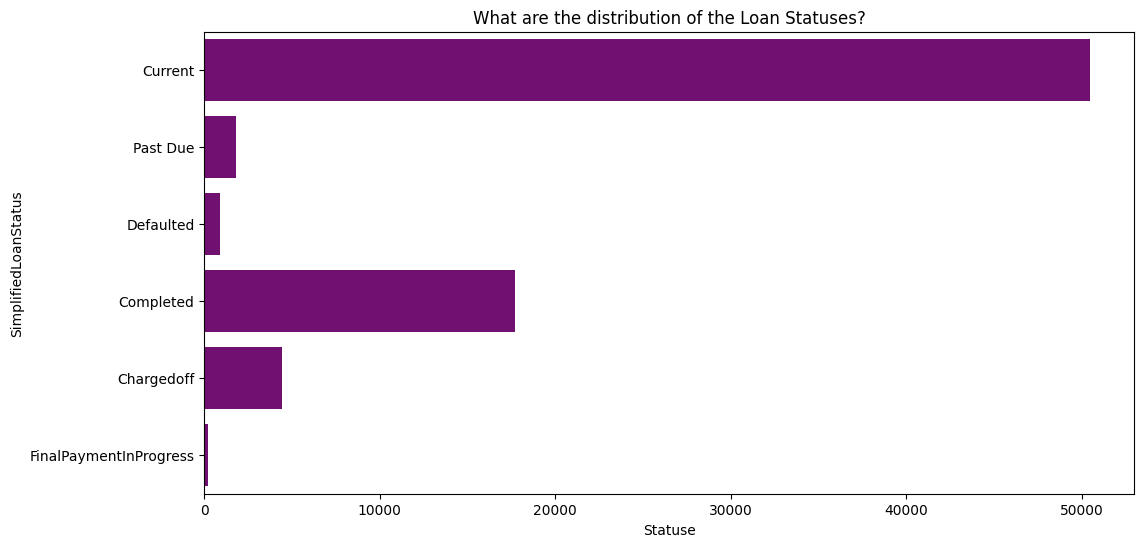

In [3]:
plt.figure(figsize=(12, 6))
sns.countplot(data = df, y = 'SimplifiedLoanStatus', color = 'purple')
plt.xlabel('Statuse')   
plt.title('What are the distribution of the Loan Statuses?');

> It seems that the majority status among the loan statuses is the `current` which is 50462, While the completed are success story they are  `17675`. The chargedoff however are 4444 cases they are failed loans. While the `deafulted` are the cases in danger of `chargedoff` they reach 885. And the past due are slightly larger 1835 but still not in danger of charge off. 

> The chraged off and the deafulted represntts the actual risks for these loans.

> Nothing unusual with this distribution.

## Which states are the borrowers from?

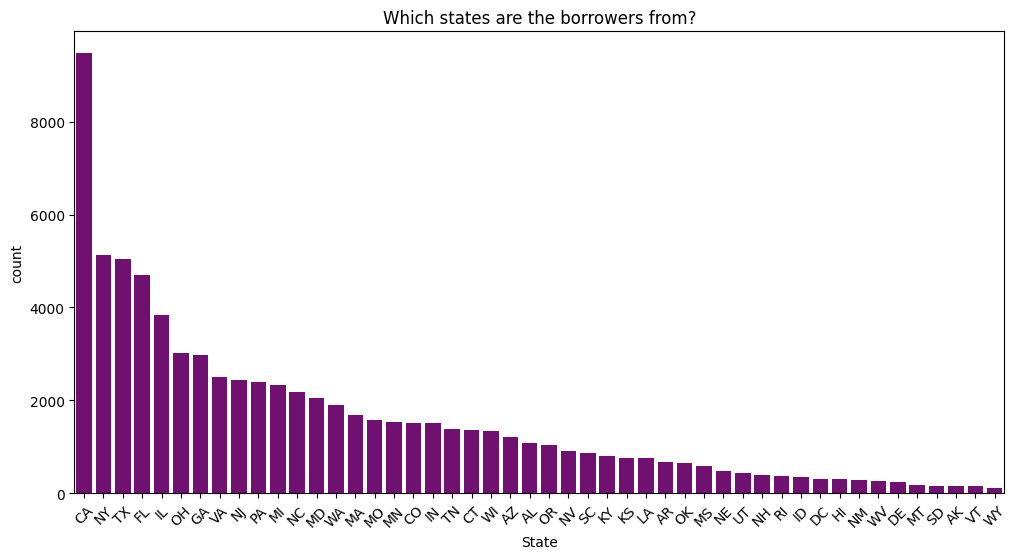

In [4]:
counts_borrower = df['BorrowerState'].value_counts()
plt.figure(figsize=(12, 6))
ax = sns.barplot(counts_borrower, color = 'purple')
plt.title('Which states are the borrowers from?')
plt.xlabel('State')
plt.xticks(rotation = 45);

> California boasts the highest number of borrowers among all US states, followed closely by Texas, New York, and Florida. On the other end of the spectrum, states like South Dakota, Alaska, Vermont, and Wyoming have significantly lower borrower counts.

> California is an unpper bound outlier, however this is numerically and valid values that will not be handled.

##  What are the employment statuses of students who are taking loans?

In [5]:
## List of students occupations
study_occupations = ['Student - College Freshman', 'Student - College Junior', 'Student - Community College', 
                     'Student - College Sophomore', 'Student - Technical School']

## Labels for the visualization
labels = ['College Freshman', 'College Junior','Community College', 'College Sophomore', 'Technical School']

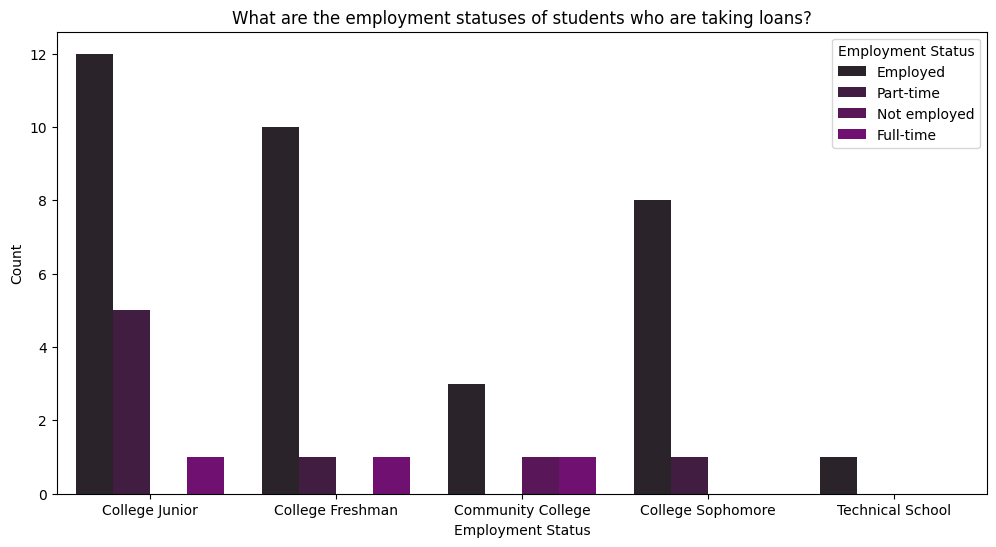

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['Occupation'].isin(study_occupations)], x='Occupation', hue='EmploymentStatus', color='purple')
plt.title('What are the employment statuses of students who are taking loans?')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(ticks= study_occupations, labels= labels)
plt.legend(title='Employment Status');

> Employment is widespread among students taking loans, with the majority falling into the "Employed" category across all educational levels.

> Part-time work appears to be the most common arrangement, indicated by the higher count of "Part-time" compared to "Full-time" in most categories. Expected since they are students.

> Community college students exhibit a notably higher proportion of full-time employment compared to other groups.

> The "Technical School" category shows a lower overall employment rate and a higher percentage of students who are not employed.

## How does the Original Amount of Loan change over time?

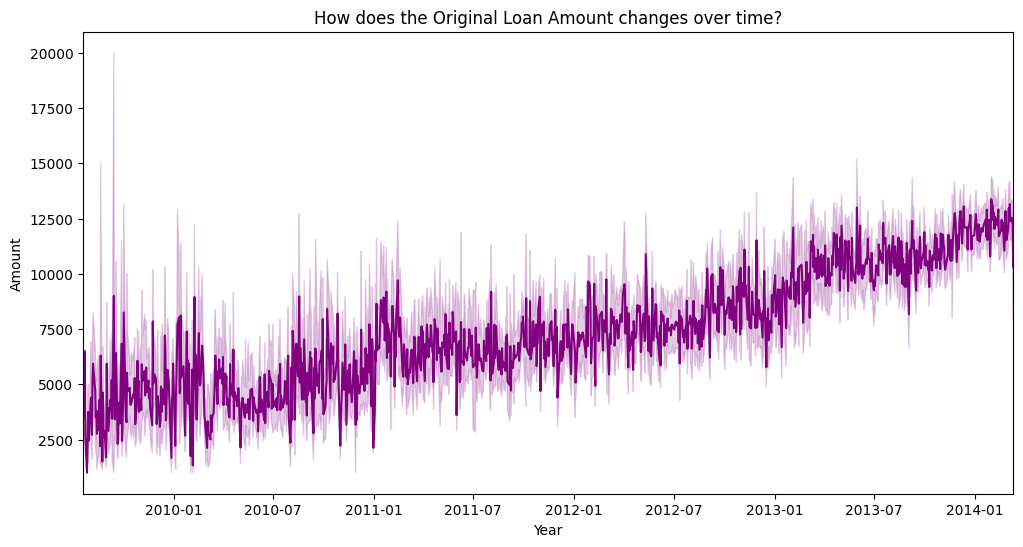

In [7]:
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate']) ## convert to datetime datatype
plt.figure(figsize=(12, 6))
sns.lineplot(data= df, x = 'LoanOriginationDate', y ='LoanOriginalAmount', color = 'purple')
plt.ylabel('Amount')
plt.xlabel('Year')
plt.xlim(pd.to_datetime('2009-07-20'), pd.to_datetime('2014-03-12')) ## the max and min dates of the Loan Origination Date
plt.title('How does the Original Loan Amount changes over time?');

> There is a noticeable increase in loan amounts over the years, suggesting that borrowers have been taking out larger loans as time progresses.

> Interestingly, the year 2009 stands out with some of the highest loan amounts, indicating that during this period, there were notably larger loans compared to other years.

##  How does the original loan amount vary across different income ranges and loan statuses?

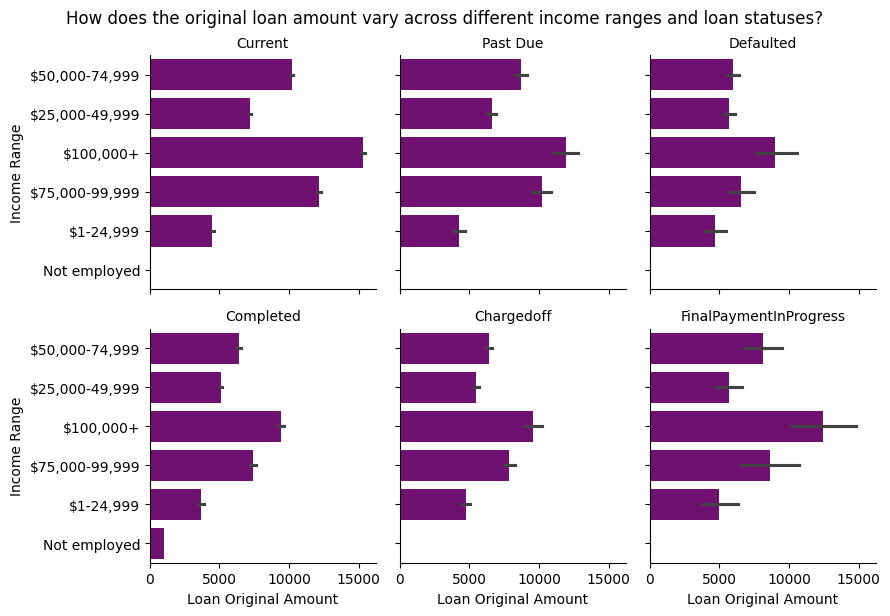

In [8]:
## Facet Plotting three variables SimplifiedLoanStatus, LoanOriginalAmount and IncomeRange
grid = sns.FacetGrid(data = df, col = 'SimplifiedLoanStatus', col_wrap = 3)
grid.map(sns.barplot, 'LoanOriginalAmount', 'IncomeRange', color = 'Purple')
grid.set_titles("{col_name}")
grid.set_axis_labels('Loan Original Amount', 'Income Range')
plt.suptitle('How does the original loan amount vary across different income ranges and loan statuses?', y=1.02);

> As income range increases, the loan original amount also tends to increase. This is evident in the length of the bars across different income ranges.

> The "Current" and "Completed" statuses, where the highest loan original amount is not always associated with the highest income range.

> Higher income ranges might be associated with fewer defaults, which is worth investigating.

> Across all loan statuses, the highest Loans amounts are associated with the 100,000+ income range. 

## How do different terms group with the selected variables?

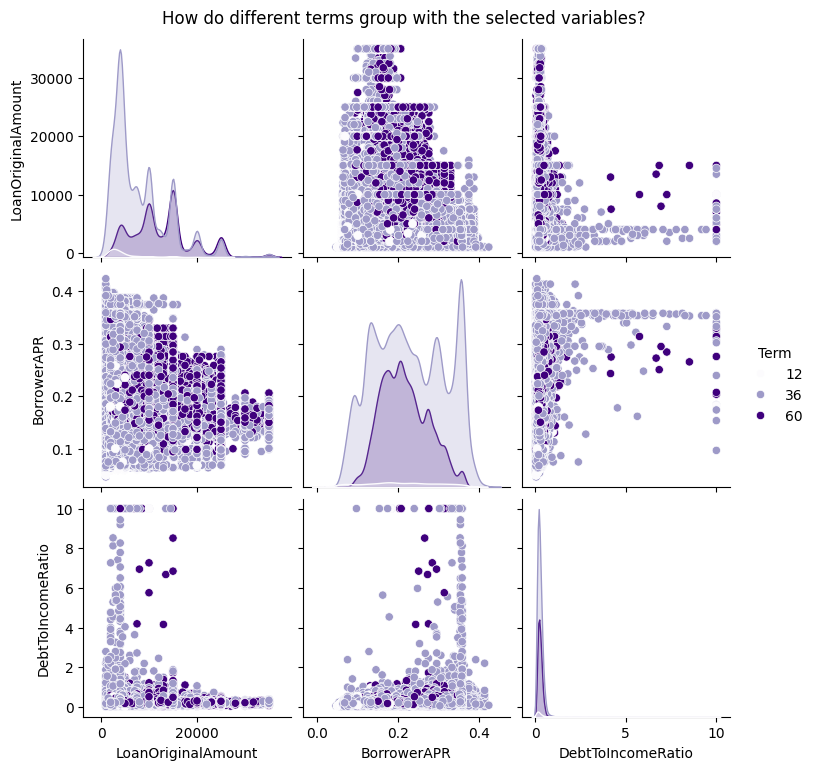

In [9]:
## Plot Matrix
selected_columns = ['LoanOriginalAmount', 'BorrowerAPR','DebtToIncomeRatio']
sns.pairplot(data=df, vars=selected_columns, hue='Term', palette='Purples')
plt.suptitle('How do different terms group with the selected variables?', y=1.02);

> Longer terms (36 and 60 months) tend to be associated with higher loan original amounts.

> There doesn't seem to be a strong relationship between term and borrower APR or debt-to-income ratio.

> Loan Original Amount vs. Borrower APR have a weak positive correlation, suggesting that larger loans might have slightly higher APRs. 

In [14]:
!jupyter nbconvert --to slides Part_II_explanatory.ipynb

[NbConvertApp] Converting notebook Part_II_explanatory.ipynb to slides
[NbConvertApp] Writing 1371374 bytes to Part_II_explanatory.slides.html
